In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Gotem Pumpkins.csv")
test_data = pd.read_csv("Freyja_Pumpkins.csv")
test_data

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,63011,961.163,371.5589,216.5940,63511,283.2456,0.8125,0.9921,0.7301,0.8571,1.7155,0.7623,Çerçevelik
1,1,75917,1069.411,420.2925,230.6208,76613,310.9028,0.8360,0.9909,0.7132,0.8342,1.8224,0.7397,Çerçevelik
2,2,75988,1091.948,447.6035,217.3051,76566,311.0481,0.8742,0.9925,0.7079,0.8008,2.0598,0.6949,Ürgüp Sivrisi
3,3,85968,1168.743,479.1606,229.2326,87008,330.8442,0.8781,0.9880,0.7495,0.7909,2.0903,0.6905,Çerçevelik
4,4,85386,1138.193,438.2698,248.8453,86282,329.7224,0.8232,0.9896,0.7093,0.8283,1.7612,0.7523,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,96325,1305.855,551.3950,224.9857,97155,350.2068,0.9130,0.9915,0.5223,0.7098,2.4508,0.6351,Ürgüp Sivrisi
496,496,97672,1245.298,512.0015,243.4767,98354,352.6469,0.8797,0.9931,0.6428,0.7915,2.1029,0.6888,Ürgüp Sivrisi
497,497,74286,1119.418,469.9465,202.6598,75036,307.5449,0.9022,0.9900,0.7523,0.7450,2.3189,0.6544,Ürgüp Sivrisi
498,498,85924,1113.974,428.2503,256.8931,86515,330.7595,0.8001,0.9932,0.7242,0.8701,1.6670,0.7724,Çerçevelik


## Visualization

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Unnamed: 0,1.000000,-0.015309,-0.026748,-0.027842,0.008706,-0.015416,-0.013806,-0.022047,0.001010,0.048424,0.036763,-0.031379,0.027117
Area,-0.015309,1.000000,0.930120,0.793882,0.689095,0.999798,0.998535,0.168770,0.169039,-0.003753,-0.145632,0.166356,-0.167291
Perimeter,-0.026748,0.930120,1.000000,0.948051,0.400400,0.931543,0.929545,0.469946,0.076395,-0.121404,-0.494012,0.491042,-0.488061
Major_Axis_Length,-0.027842,0.793882,0.948051,1.000000,0.112192,0.793849,0.792010,0.705272,0.126520,-0.193530,-0.677444,0.728367,-0.726363
Minor_Axis_Length,0.008706,0.689095,0.400400,0.112192,1.000000,0.689401,0.693495,-0.579354,0.100111,0.226474,0.558198,-0.589740,0.593788
Convex_Area,-0.015416,0.999798,0.931543,0.793849,0.689401,1.000000,0.998332,0.168246,0.149451,-0.005233,-0.149988,0.166294,-0.167337
Equiv_Diameter,-0.013806,0.998535,0.929545,0.792010,0.693495,0.998332,1.000000,0.165596,0.171100,-0.000968,-0.141299,0.162392,-0.163466
Eccentricity,-0.022047,0.168770,0.469946,0.705272,-0.579354,0.168246,0.165596,1.000000,0.049416,-0.309382,-0.889274,0.951407,-0.981401
Solidity,0.001010,0.169039,0.076395,0.126520,0.100111,0.149451,0.171100,0.049416,1.000000,0.067013,0.202458,0.025511,-0.020358
Extent,0.048424,-0.003753,-0.121404,-0.193530,0.226474,-0.005233,-0.000968,-0.309382,0.067013,1.000000,0.329136,-0.308912,0.317763


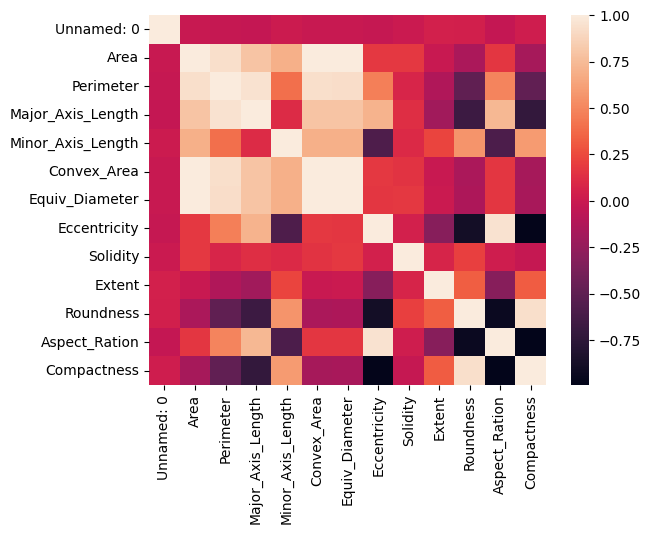

In [3]:
train_corr = train_data.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(train_corr)
train_corr


## Extracting Features and Target Variable

In [4]:
def preprocess(X):
    
    X = X.drop(['Area'], axis=1)
    X = X.drop(['Unnamed: 0', 'Minor_Axis_Length', 'Major_Axis_Length','Eccentricity', 'Convex_Area','Aspect_Ration','Perimeter'],axis=1)

    X['Class'] = X['Class'].map({'Çerçevelik':1,'Ürgüp Sivrisi':0})
    
    return X

In [5]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

X_train = train_data.drop(columns='Class').values
y_train = train_data['Class'].values

X_test = test_data.drop(columns='Class').values
y_test = test_data['Class'].values


In [6]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test s: ' + str(y_test.shape))

The shape of X_train is: (2000, 5)
The shape of y_train is: (2000,)
We have m = 2000 training examples
The shape of X_test is: (500, 5)
The shape of y_test s: (500,)


## Normalization

Normalization is done to bring all the data to similarscale, eliminating mathematical disparity

In [7]:
def zscore_normalize (X) :
    mu     = np.mean(X, axis=0) # Calculating the mean
    sigma  = np.std(X, axis=0)  # Calculating the standard deviation
    X_norm = (X - mu) / sigma 

    return X_norm

In [8]:
X_train = zscore_normalize(X_train)
X_test = zscore_normalize(X_test)
X_train

array([[ 0.35353644,  0.54251211, -2.42682027, -1.00398098, -1.09686068],
       [ 1.60838361,  0.76252006,  0.85581445,  0.13094273, -0.15843988],
       [ 1.27999651,  0.59751409, -1.7004854 , -0.44194073, -0.59814618],
       ...,
       [-0.60748621,  0.32250416,  1.15665338,  1.31104651,  1.07121495],
       [-0.47952655,  0.1024962 , -0.93426028,  0.43093848,  0.40689678],
       [-0.41646844, -4.43516779, -2.26725929, -1.57325003, -1.13493049]])

Defining Sigmoid functon:

In [9]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1/(1 + np.exp(-z))
    return g

#defining function to compute total cost of all iterations
def compute_cost_reg_logistic(X, y, w, b, lambda_ = 1):
    m,n  = X.shape

    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    cost_without_reg = -(1/m) * (np.dot(y, np.log(f_wb)) + np.dot((1-y), np.log(1-f_wb)))

    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)

    reg_cost = (lambda_/(2*m))*reg_cost

    total_cost = cost_without_reg + reg_cost
    
    return total_cost

def compute_gradient_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    
    errors = f_wb - y

    dj_dw = (1/m) * np.dot(X.T, errors) + (lambda_/m) * w  
    dj_db = (1/m) * np.sum(errors)                     
    
    return dj_db, dj_dw

In [10]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_reg(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in -= alpha * dj_dw               
        b_in -= alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost_reg_logistic(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [11]:
# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.00005
# Some gradient descent settings
n_epochs = 90000
y_train = train_data['Class'].values
w = np.random.rand(X_train.shape[1])-0.5


w,b, J_history,w_history = gradient_descent(X_train, y_train, w, 1, 1, n_epochs, lambda_)

Iteration    0: Cost     0.55   
Iteration 9000: Cost     0.32   
Iteration 18000: Cost     0.32   
Iteration 27000: Cost     0.32   
Iteration 36000: Cost     0.32   
Iteration 45000: Cost     0.32   
Iteration 54000: Cost     0.32   
Iteration 63000: Cost     0.32   
Iteration 72000: Cost     0.32   
Iteration 81000: Cost     0.32   
Iteration 89999: Cost     0.32   


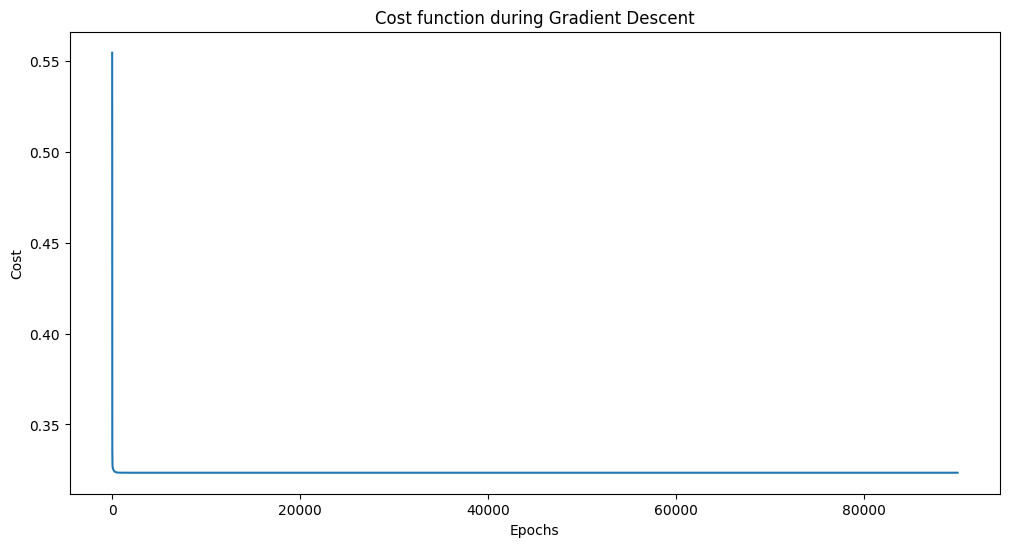

In [18]:
# Plot the cost function
plt.figure(figsize=(12, 6))
plt.plot(J_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost function during Gradient Descent')

plt.show()


In [19]:
def calculate_accuracy(X, y, w, b):
    
    # Compute probabilities
    probabilities = sigmoid(np.dot(X, w) + b)
    
    # Convert probabilities to binary predictions
    predictions = (probabilities >= 0.5).astype(int)
    
    # Compare predictions with actual labels
    correct_predictions = np.sum(predictions.flatten() == y)
    
    # Calculate accuracy
    accuracy = correct_predictions / len(y)
    
    return accuracy

# Calculate accuracy on training and test data
train_accuracy = calculate_accuracy(X_train, y_train, w, b)
test_accuracy = calculate_accuracy(X_test, y_test, w, b)

print(f"Training Accuracy: {train_accuracy :f}")
print(f"Test Accuracy: {test_accuracy :f}")


Training Accuracy: 0.870000
Test Accuracy: 0.886000


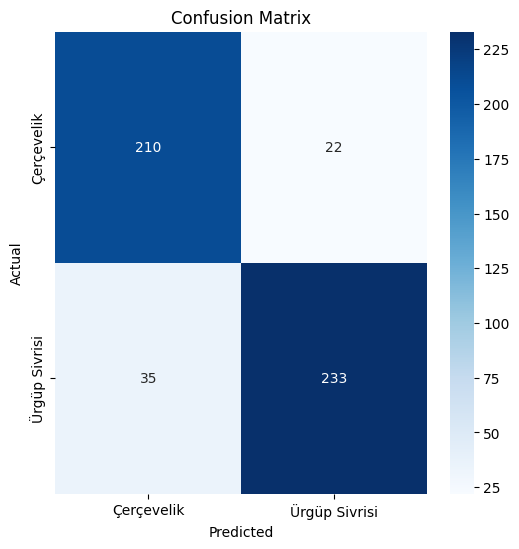

In [20]:

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True positive
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True negative
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False positive
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False negative
    
    return np.array([[TN, FP], [FN, TP]])

# Calculate predictions on test set
predictions = (sigmoid(np.dot(X_test, w) + b) >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions.flatten())


def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Çerçevelik', 'Ürgüp Sivrisi'], yticklabels=['Çerçevelik', 'Ürgüp Sivrisi'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm)

